# Module 1: Data Collection

In [1]:
import pandas as pd

In [ ]:
df = pd.read_csv("fwi_dataset_asitwas.csv")

In [ ]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


**0 - Bejaia & 1 - Sidi-Bel Abbes**

In [ ]:
df["Region"] = df["Region"].map({0: "Bejaia", 1: "Sidi-Bel Abbes"})

In [ ]:
df.head(10)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,Bejaia
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,Bejaia
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,Bejaia
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,not fire,Bejaia
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,Bejaia
5,6,6,2012,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,fire,Bejaia
6,7,6,2012,33,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2,fire,Bejaia
7,8,6,2012,30,73,15,0.0,86.6,12.1,38.3,5.6,13.5,7.1,fire,Bejaia
8,9,6,2012,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3,not fire,Bejaia
9,10,6,2012,28,79,12,0.0,73.2,9.5,46.3,1.3,12.6,0.9,not fire,Bejaia


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4    RH          244 non-null    int64  
 5    Ws          244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    object 
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    object 
 13  Classes      243 non-null    object 
 14  Region       244 non-null    object 
dtypes: float64(5), int64(6), object(4)
memory usage: 28.7+ KB


Note : If you manually adjust values in 167th row in excel you, don't need to typecaste dc and fwi. They are objects(without manually adjusting in excel) now because the values got shifted from right to left columns.

**Typecasting of DC and FWI from obj to Float**

In [ ]:
df['DC'] = pd.to_numeric(df['DC'], errors='coerce')
df['FWI'] = pd.to_numeric(df['FWI'], errors='coerce')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4    RH          244 non-null    int64  
 5    Ws          244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       244 non-null    object 
dtypes: float64(7), int64(6), object(2)
memory usage: 28.7+ KB


In [ ]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             1
ISI            0
BUI            0
FWI            1
Classes        1
Region         0
dtype: int64

In [ ]:
df.duplicated().sum()

np.int64(0)

# Module 2: Data Exploration and Data Preprocessing

**Impute null values in classes**

In [ ]:
df.columns = df.columns.str.strip()

In [ ]:
df['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', nan, 'not fire    '], dtype=object)

In [ ]:
df['Classes'] = df['Classes'].fillna(df['Classes'].mode()[0])

In [ ]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             1
ISI            0
BUI            0
FWI            1
Classes        0
Region         0
dtype: int64

**Drop null values**

In [ ]:
df = df.dropna() #This will remove any row that contains at least one NaN

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 243 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    object 
dtypes: float64(7), int64(6), object(2)
memory usage: 30.4+ KB


In [ ]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

**Drop Classes Feature**

In [ ]:
df = df.drop(columns=['Classes'])

In [ ]:
df.head(5)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,Bejaia
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,Bejaia
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,Bejaia
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,Bejaia
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,Bejaia


**Outlier detection using boxplots**

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

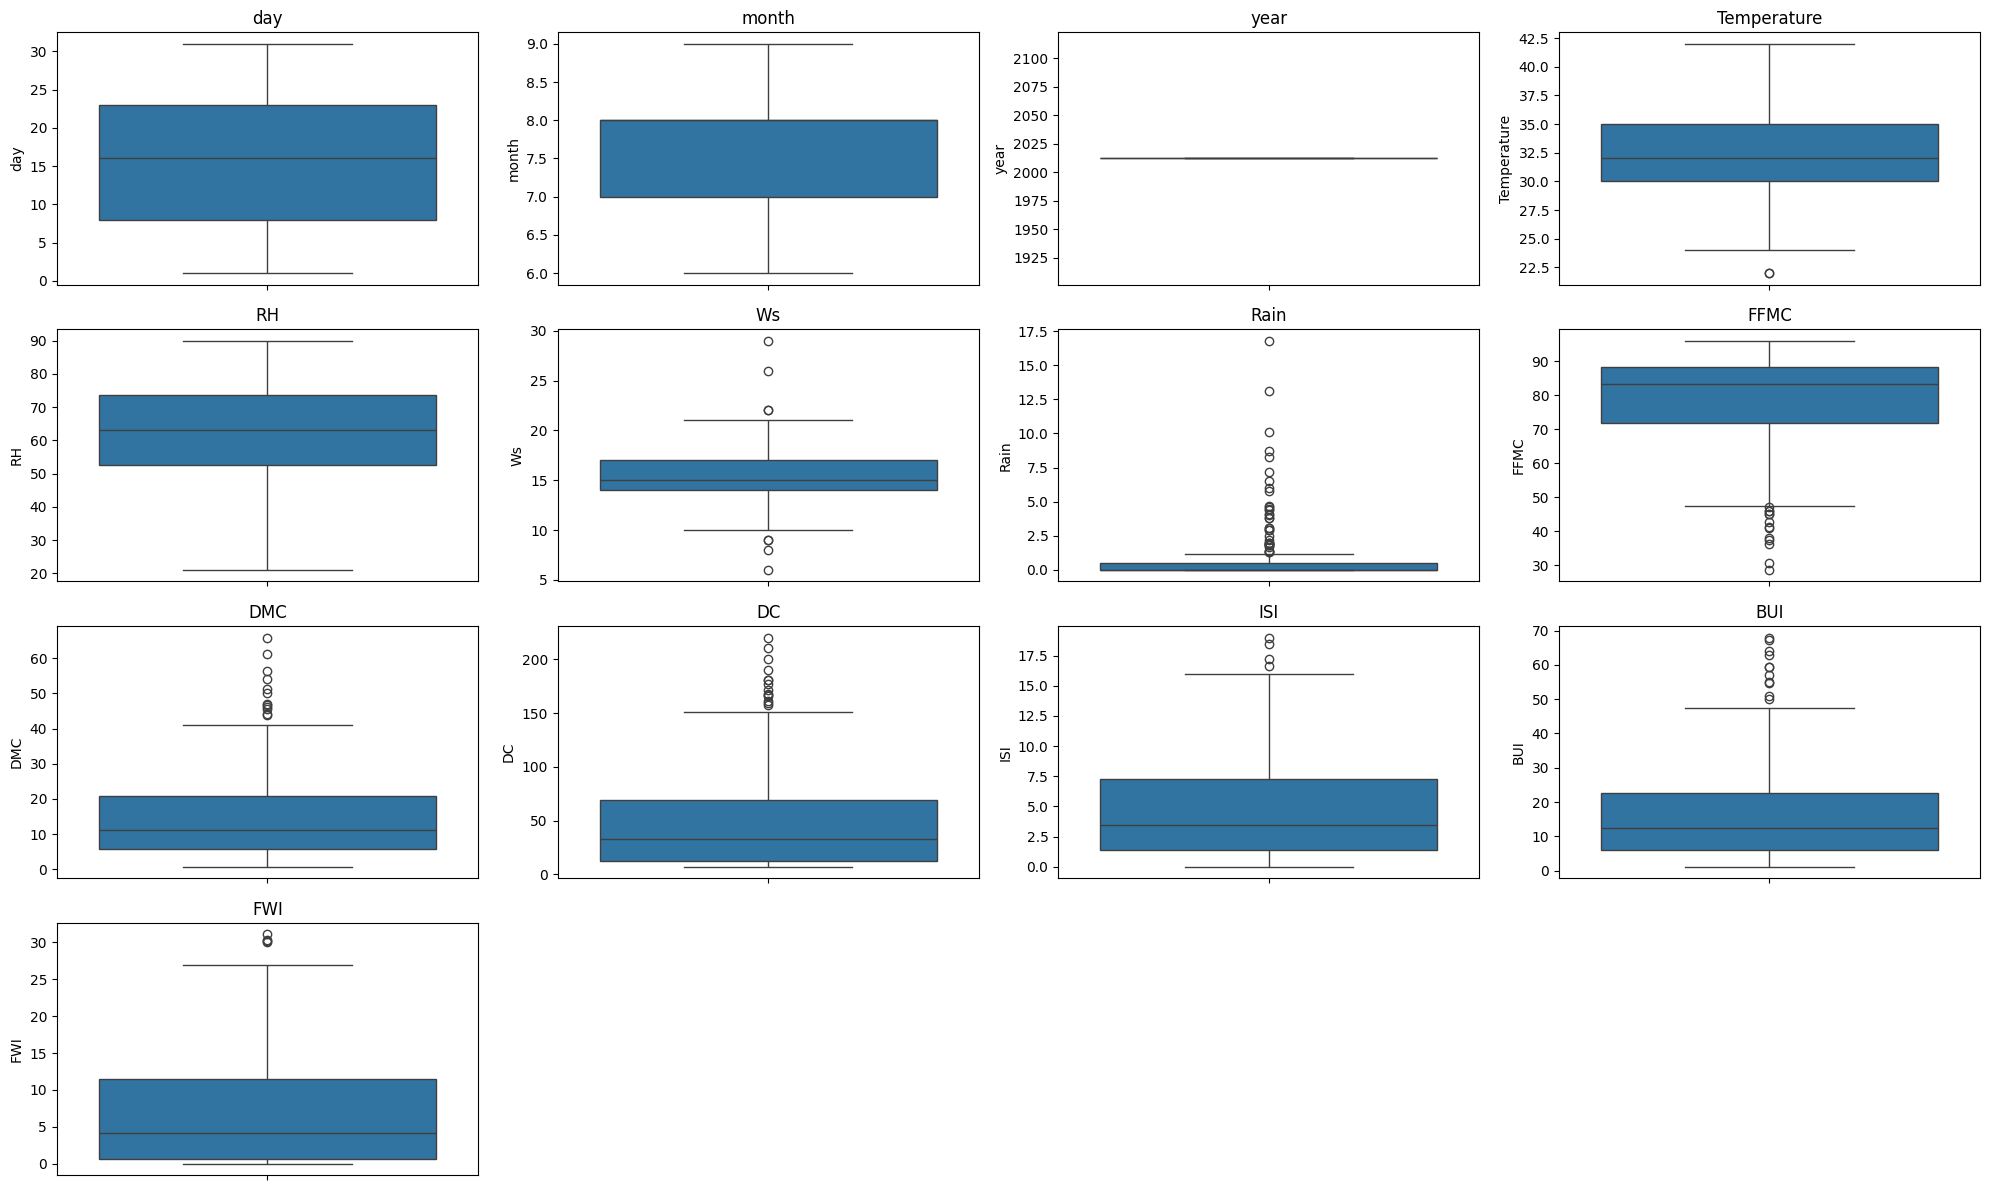

In [ ]:
plt.figure(figsize=(20, 12))
n_cols = len(numeric_cols)
n_rows = (n_cols // 4) + 1

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, 4, i)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

**Satistical Method to find outliers**

In [3]:
import numpy as np

In [ ]:

outliers = {}

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR


    outlier_indices = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index
    outliers[col] = outlier_indices

    print(f"{col}: {len(outlier_indices)} outliers")


day: 0 outliers
month: 0 outliers
year: 0 outliers
Temperature: 2 outliers
RH: 0 outliers
Ws: 8 outliers
Rain: 35 outliers
FFMC: 13 outliers
DMC: 12 outliers
DC: 14 outliers
ISI: 4 outliers
BUI: 11 outliers
FWI: 4 outliers


**Visualization of data distributions using histograms**

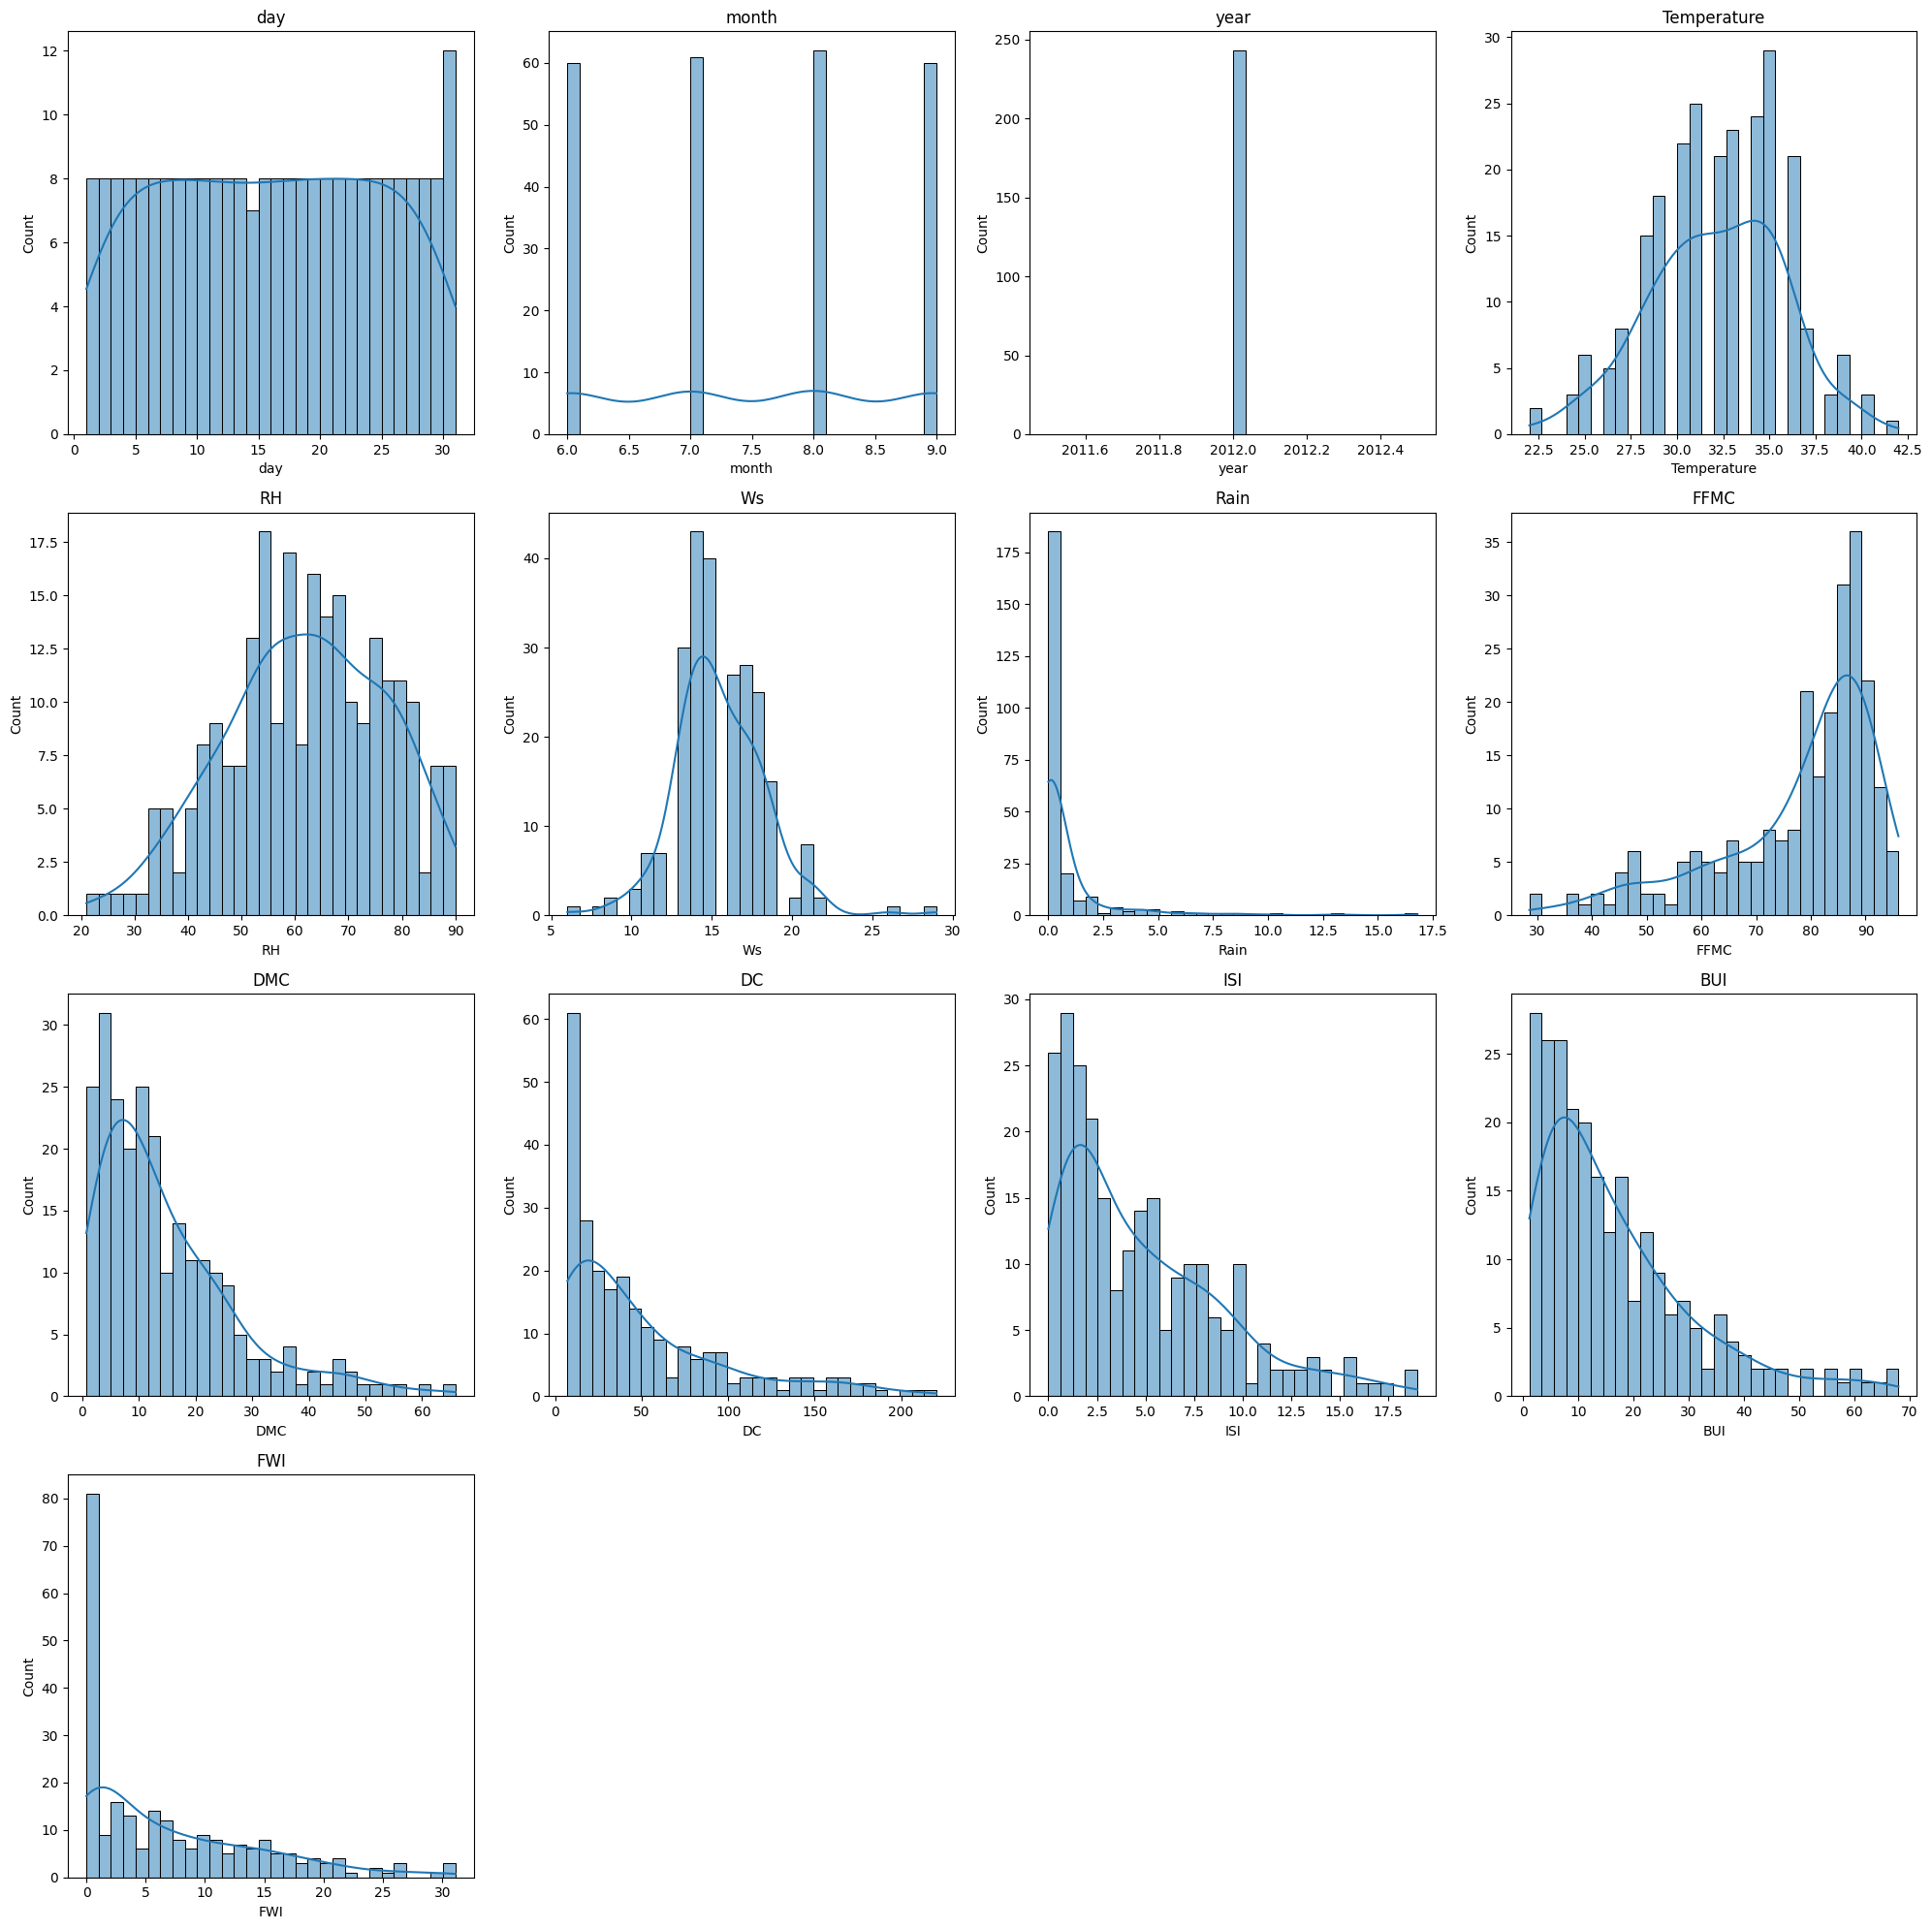

In [ ]:
numeric_cols = df.select_dtypes(include='number').columns
n_cols = len(numeric_cols)
n_rows = (n_cols // 4) + (1 if n_cols % 4 else 0)

plt.figure(figsize=(20, 5 * n_rows))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, 4, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

**Visualization of data distributions using density plots**

C:\Users\hp\AppData\Local\Temp\ipykernel_18448\3921056745.py:9: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df[col], fill=True, color='blue')


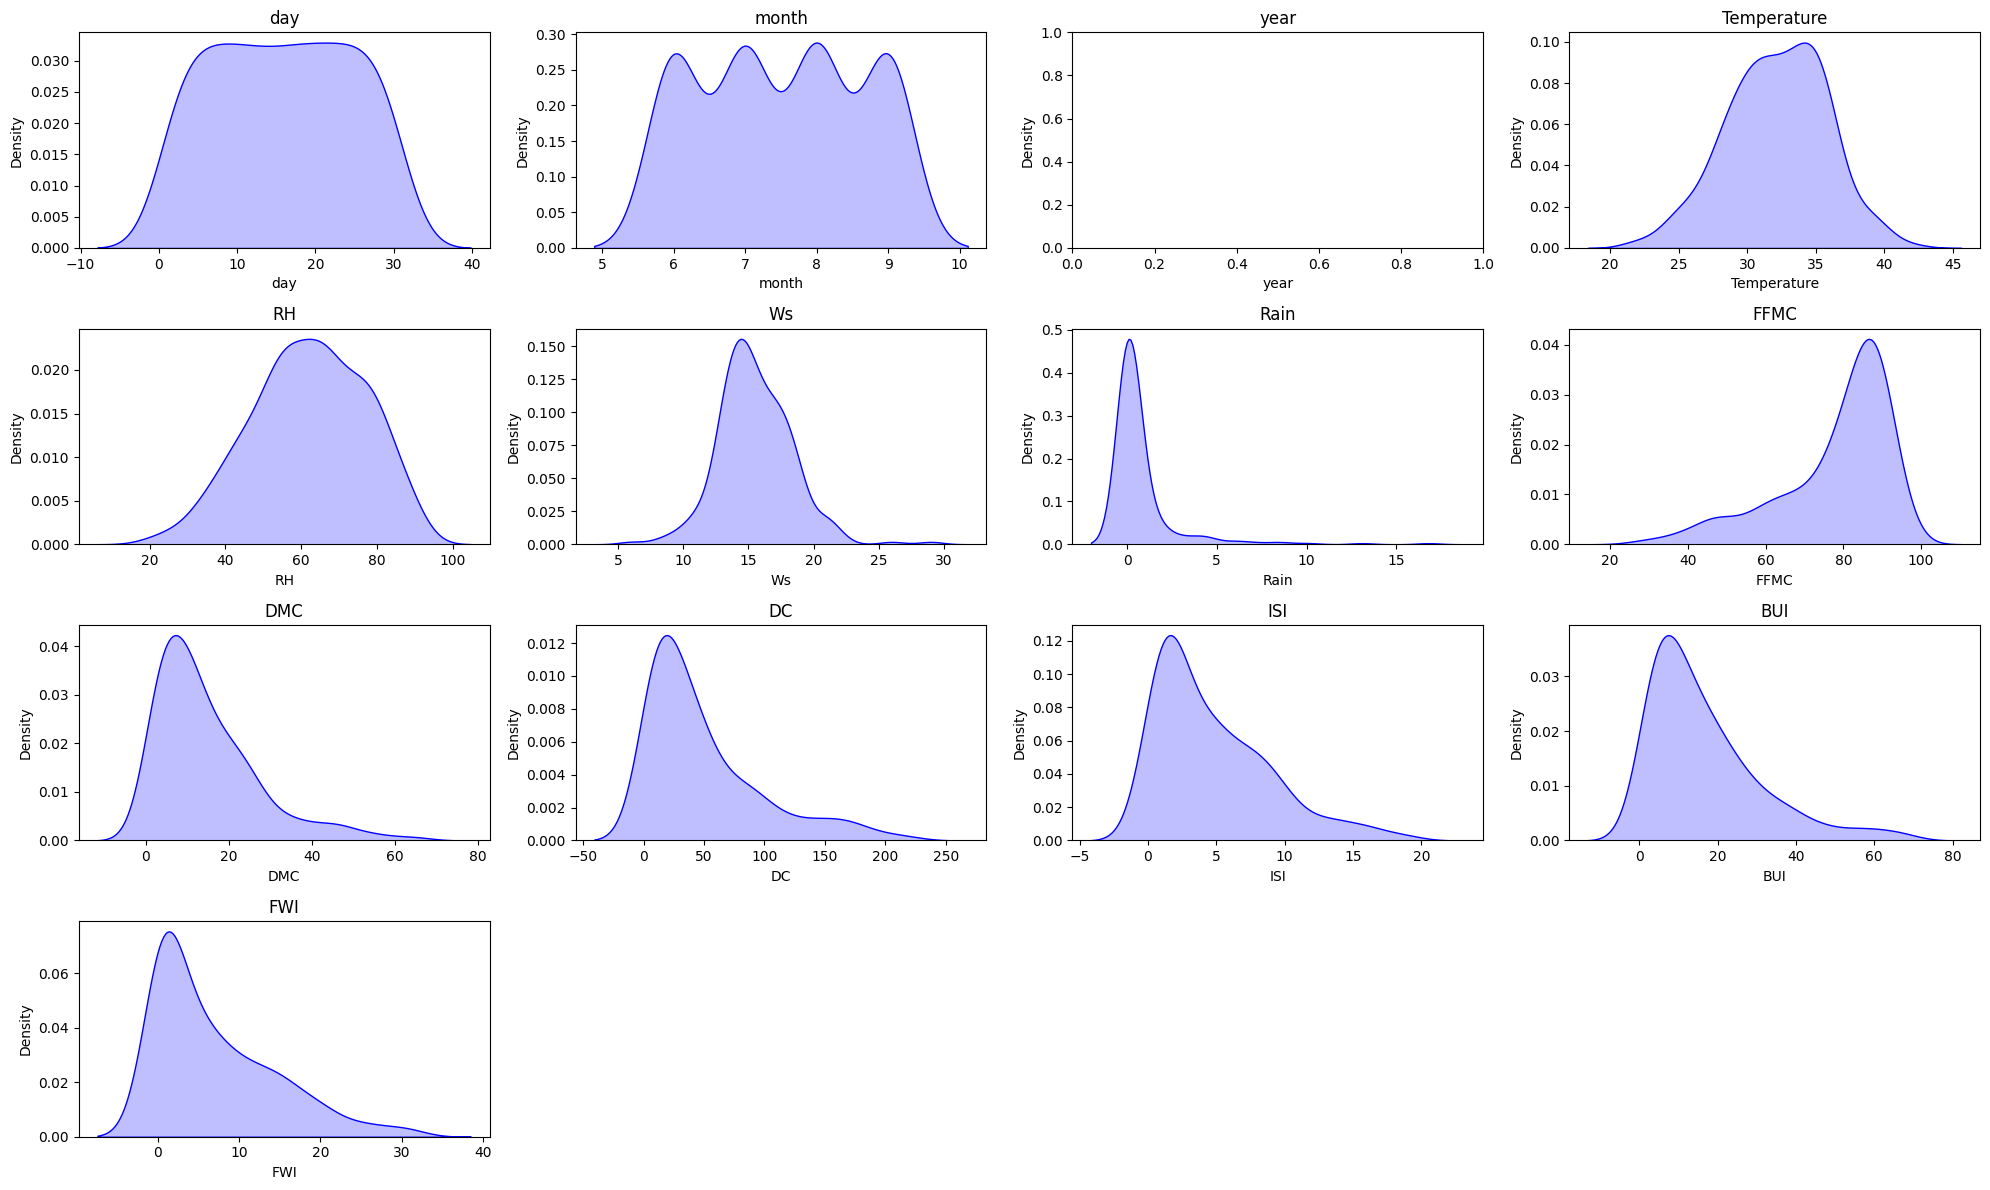

In [ ]:
plt.figure(figsize=(20, 12))
n_cols = len(numeric_cols)
n_rows = (n_cols // 4) + 1

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, 4, i)

    # KDE plot with updated syntax
    sns.kdeplot(df[col], fill=True, color='blue')

    plt.title(col)

plt.tight_layout()
plt.show()

**Correlation matirx**

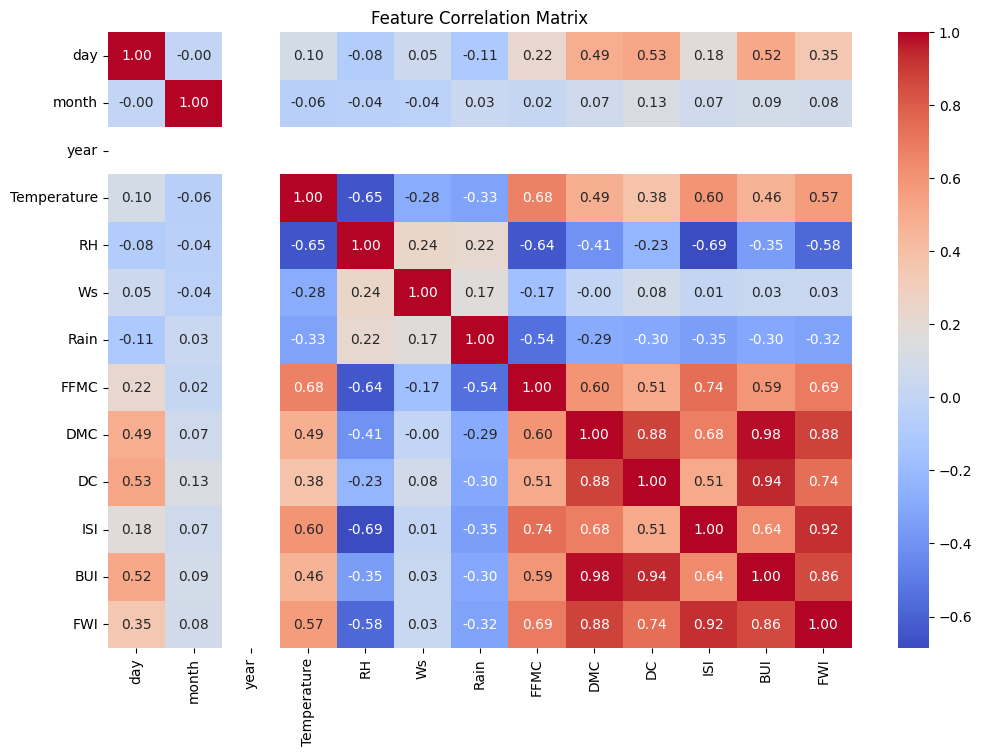

In [ ]:
numeric_cols = df.select_dtypes(include='number').columns

plt.figure(figsize=(12, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

**Sactter plots**

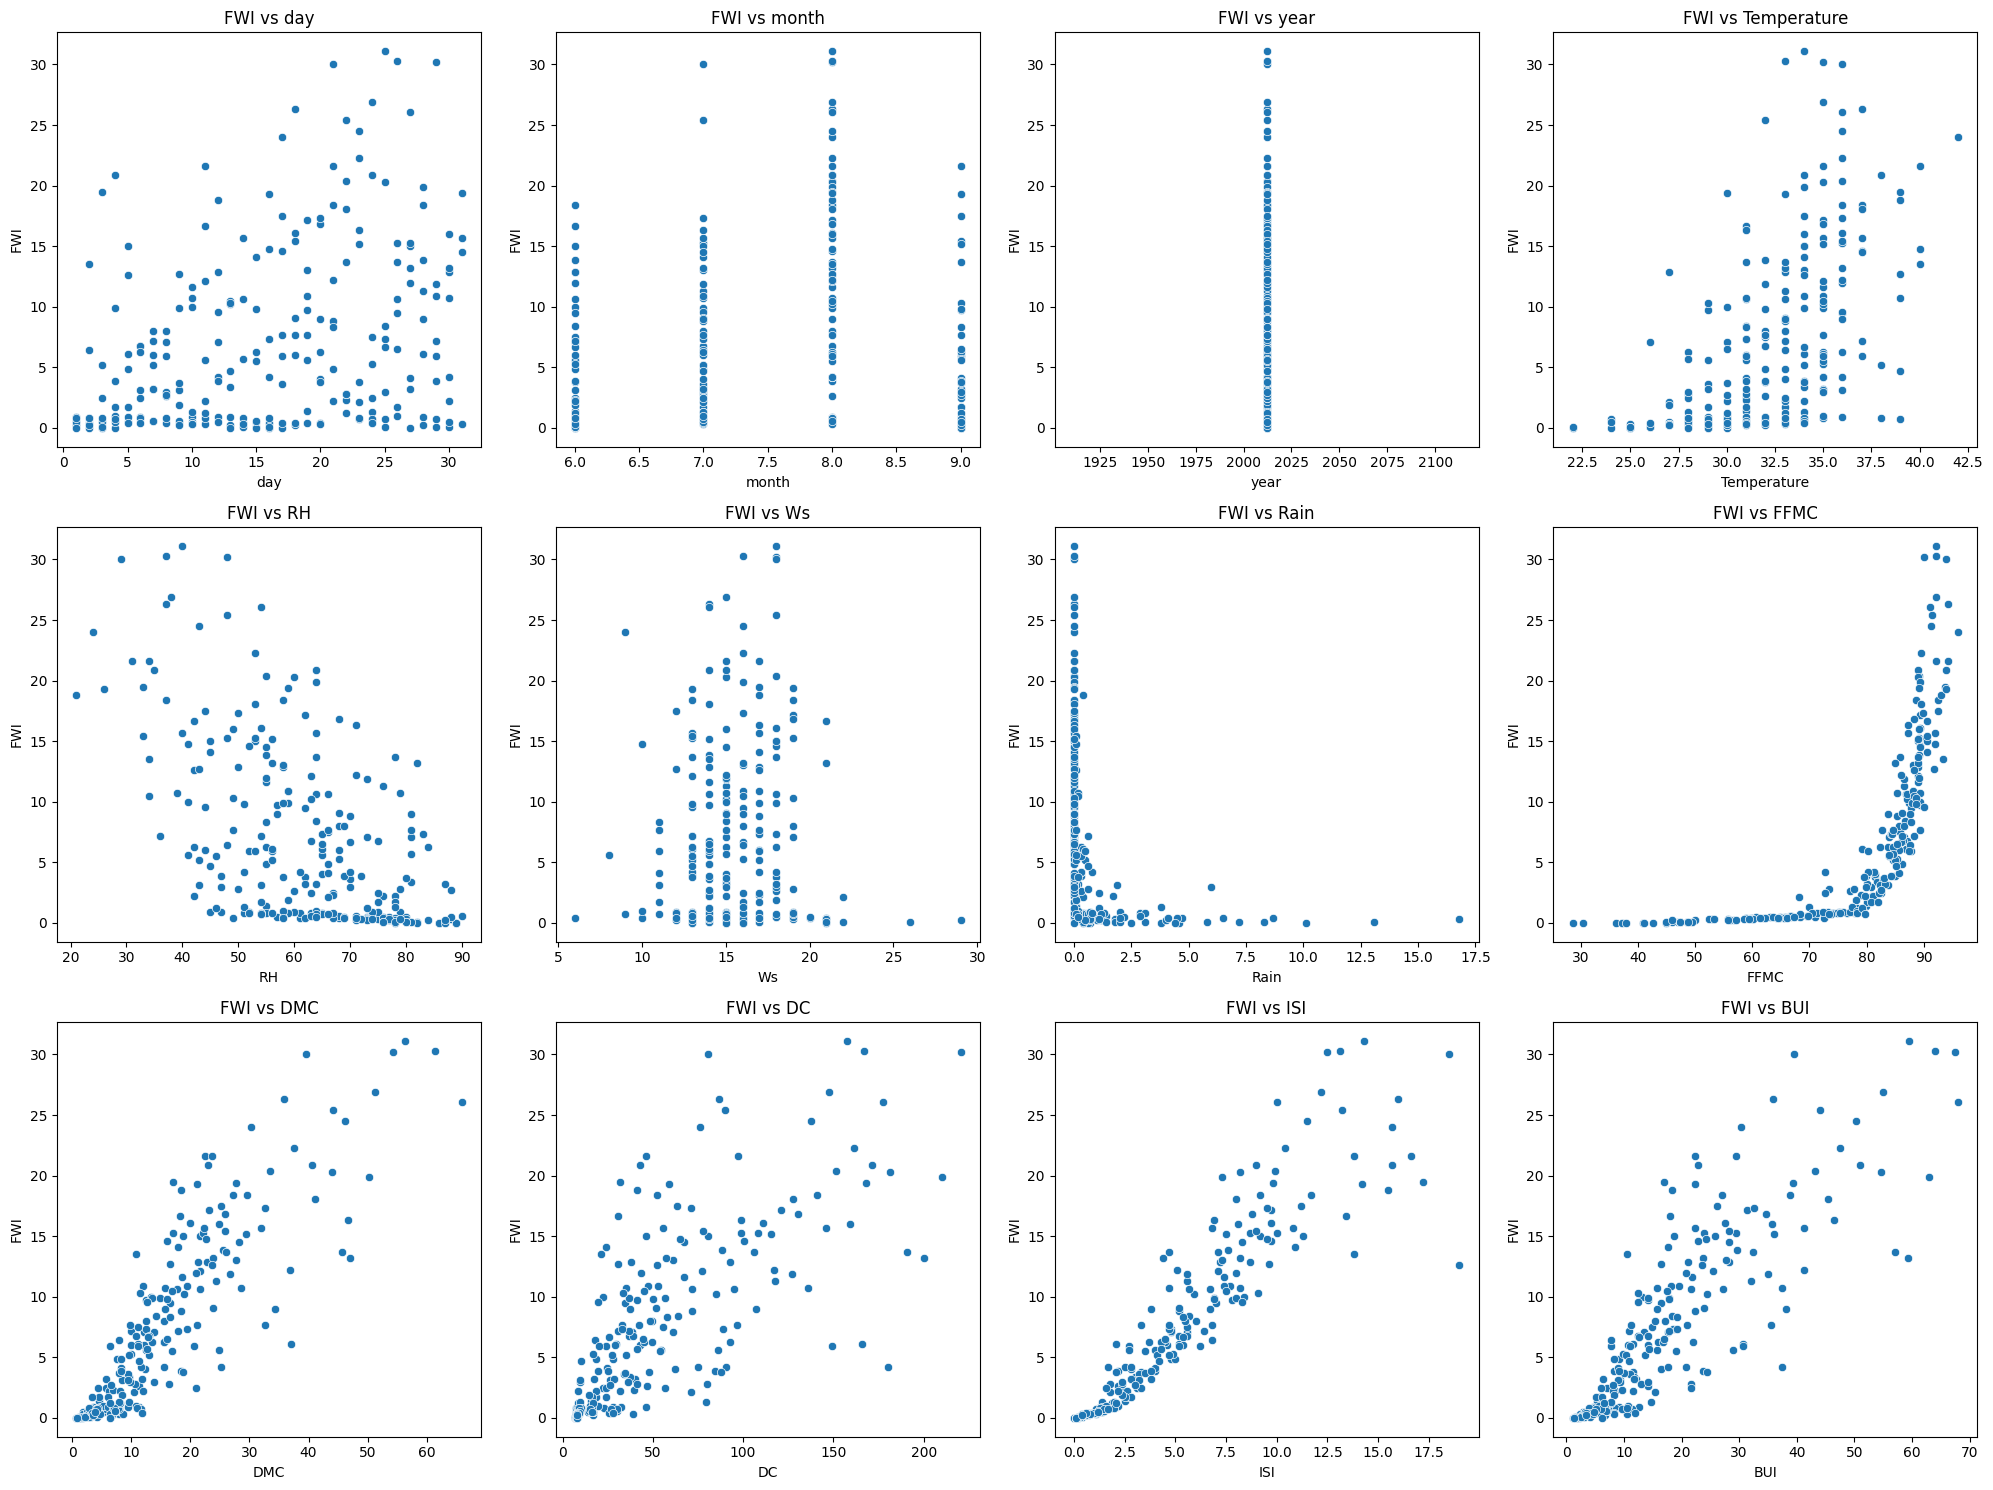

In [ ]:
features = numeric_cols.drop("FWI")
n_cols = len(features)
n_rows = (n_cols // 4) + (1 if n_cols % 4 else 0)  # auto rows

plt.figure(figsize=(20, 5 * n_rows))
for i, col in enumerate(features, 1):
    plt.subplot(n_rows, 4, i)
    sns.scatterplot(x=df[col], y=df["FWI"])
    plt.title(f"FWI vs {col}")
plt.tight_layout()
plt.show()

**Dropping the unnecessary features according to correlation analysis**

In [ ]:
df = df.drop(columns=['day', 'month', 'year'])


In [ ]:
df.head(5)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,Bejaia
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,Bejaia
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,Bejaia
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,Bejaia
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,Bejaia


**Encoding Categorical Values(Region is only categorical value in our dataset)**

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Region'] = le.fit_transform(df['Region'])

#OR (as we know the categories)
#df['Region'] = df['Region'].map({'Bejaia': 0, 'Sidi-Bel Abbes': 1})


In [ ]:
df.head(5)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0


In [ ]:
df.tail(5)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
239,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1
240,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,1
241,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,1
242,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,1
243,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,1


**Save Cleaned Dataset**

In [ ]:
df.to_csv("cleaned_dataset.csv", index=False)

# Module 3: Feature Engineering and Scaling #

**Standard Scaling & Spiltting the dataset**

In [4]:
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [5]:
df = pd.read_csv("cleaned_dataset.csv")

In [6]:
df.head(5)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0


**Splitting training and testing data**

In [7]:
X = df.drop("FWI", axis=1)

y = df["FWI"]

**80%- Training data & 20%- testing data**

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

**Applying Scaler on data to normalize it**

In [9]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


**Saving scaler for future use in pipeline**

In [ ]:
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

# Module 4: Model Training using Ridge Regression #

**Train Models**

In [10]:
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [16]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.01),
    "Random Forest": RandomForestRegressor(random_state=42)
}

In [17]:
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    r2 = r2_score(y_test, y_pred)
    results[name] = r2
    print(f"{name} R² Score: {r2:.3f}")

Linear Regression R² Score: 0.988
Ridge Regression R² Score: 0.982
Lasso Regression R² Score: 0.987
Random Forest R² Score: 0.978


**Saving ridge model for future use**

In [ ]:
ridge_model = models["Ridge Regression"]  

with open("ridge.pkl", "wb") as f:
    pickle.dump(ridge_model, f)

# Module 5: Evaluation and Optimization

**Evaluate the Ridge Regression Model**

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

**Predictions**

In [22]:
y_test_pred = ridge_model.predict(X_test_scaled)

**Evaluation metrics**

In [23]:
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_test_pred)

In [24]:
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Absolute Error (MAE): 0.49
Root Mean Squared Error (RMSE): 0.74
R² Score: 0.98


**Visualization**

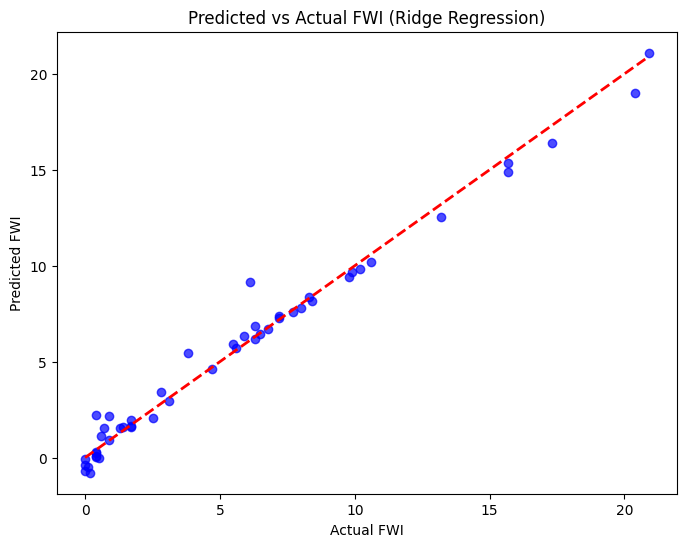

In [25]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_test_pred, color='blue', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual FWI")
plt.ylabel("Predicted FWI")
plt.title("Predicted vs Actual FWI (Ridge Regression)")
plt.show()

**Optimize Ridge Regression (Optional)**

In [26]:
from sklearn.model_selection import GridSearchCV

In [27]:
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

grid = GridSearchCV(
    Ridge(),
    param_grid,
    cv=5,
    scoring='r2'
)

In [28]:
grid.fit(X_train_scaled, y_train)

,estimator,Ridge()
,param_grid,"{'alpha': [0.01, 0.1, ...]}"
,scoring,'r2'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,alpha,1


In [29]:
print("Best alpha:", grid.best_params_['alpha'])

Best alpha: 1


**we have used alpha = 1 while training ridge model. No need to change it**

In [31]:
import sklearn
import seaborn as sns

print("scikit-learn version:", sklearn.__version__)
print("seaborn version:", sns.__version__)


scikit-learn version: 1.7.2
seaborn version: 0.13.2


In [1]:
import pandas as pd

df = pd.read_csv("cleaned_dataset.csv")
print("Min FWI:", df["FWI"].min())
print("Max FWI:", df["FWI"].max())
print("Mean FWI:", df["FWI"].mean())
print("Median FWI:", df["FWI"].median())


Min FWI: 0.0
Max FWI: 31.1
Mean FWI: 7.0353909465020585
Median FWI: 4.2


In [2]:
import pickle
import pandas as pd

# Load model
with open("ridge.pkl", "rb") as f:
    ridge = pickle.load(f)

# Feature list used during training
features = ['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'Region']

# Show coefficients sorted by absolute value
coefs = pd.Series(ridge.coef_, index=features).sort_values(key=abs, ascending=False)
print("Feature Coefficients (higher absolute value = stronger influence):")
print(coefs)


Feature Coefficients (higher absolute value = stronger influence):
ISI            5.127199
DMC            1.778292
BUI            1.722145
FFMC          -0.630518
DC             0.344541
Region        -0.168443
RH            -0.146522
Ws            -0.088958
Temperature   -0.072506
Rain           0.048441
dtype: float64
